#  **Практическое занятие №5. Введение в нейронные сети.**

## Знакомство с **tensorflow**

Туториалы: https://www.tensorflow.org/tutorials

### **Dataset** 
https://www.tensorflow.org/api_docs/python/tf/data/Dataset

```
The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

*   Create a source dataset from your input data.
*   Apply dataset transformations to preprocess the data.
*   Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

```





In [23]:
import tensorflow as tf

In [32]:
# самый простой способ - это создать датасет из списка
 
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
for element in dataset:
    print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: dataset
  warnings.warn(message)


In [35]:
dataset = dataset.map(lambda x: tf.dtypes.cast(x, tf.float32))

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: dataset
  warnings.warn(message)


In [36]:
for element in dataset:
    print(element)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: dataset
  warnings.warn(message)


In [33]:
# к датасету можно применять преобразования 
dataset = dataset.map(lambda x: x**2)
print(list(dataset.as_numpy_iterator()))

[1, 4, 9]


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: dataset
  warnings.warn(message)


In [34]:
# и фильтровать тоже можно
dataset = dataset.filter(lambda x: x < 5)
print(list(dataset.as_numpy_iterator()))

[1, 4]


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: dataset
  warnings.warn(message)


#### Сгенерируем датасет с двумя фичами

In [29]:
from sklearn import datasets
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline 

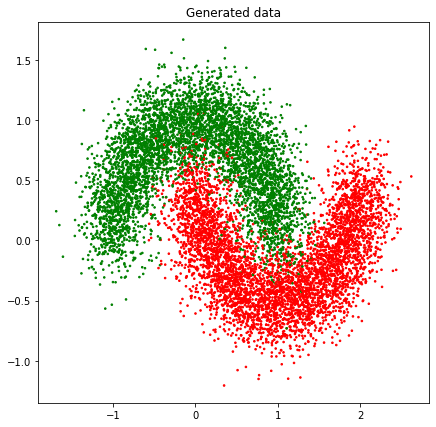

In [30]:
n_samples = 10000

X, y_true = datasets.make_moons(
    n_samples=n_samples, noise=0.2
)

plt.figure(figsize=(7, 7))

y_colors = ["r" if y else "g" for y in y_true]
plt.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10)

plt.title("Generated data")
plt.show()

**Задача**: разбейте датасет на три непересекающиеся части: train, test, val

In [37]:
# YOUR CODE HERE

idxs = np.arange(0, n_samples)
np.random.shuffle(idxs)
train_idxs, val_idxs, test_idxs = np.split(
    idxs, 
    [int(0.8 * n_samples), int(0.85 * n_samples)]
)

X_train, y_train = X[train_idxs], y_true[train_idxs]
X_val, y_val = X[val_idxs], y_true[val_idxs]
X_test, y_test = X[test_idxs], y_true[test_idxs]

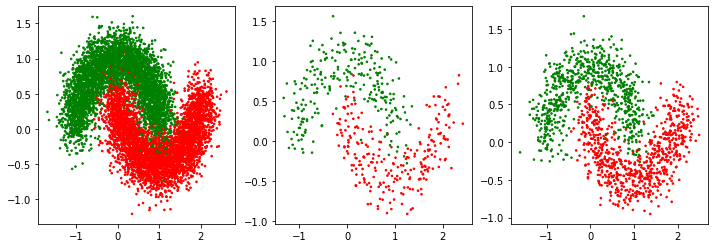

In [39]:
plt.figure(figsize=(12, 4))

for i, (x, y_arr) in enumerate([(X_train, y_train), (X_val, y_val), (X_test, y_test)]):
    ax = plt.subplot(1, 3, i+1)
    y_colors = ["r" if y else "g" for y in y_arr]
    ax.scatter(x[:, 0], x[:, 1], c=y_colors, marker=".", s=10)

plt.show()

In [44]:
print(len(X_train), len(X_val), len(X_test))

8000 500 1500


**Задача**: создайте из train и val датасеты

In [47]:
#!g1.1

# YOUR CODE HERE
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: train_dataset, val_dataset
  warnings.warn(message)


**Задача**: перемешайте обучающие данные, добавьте группировку по батчам

In [49]:
#!g1.1
batch_size = 32

train_dataset = train_dataset.shuffle(
    buffer_size = 1024, reshuffle_each_iteration=True
)

# YOUR CODE HERE

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: train_dataset, val_dataset
  warnings.warn(message)


In [50]:
#!g1.1
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: train_dataset, val_dataset
  warnings.warn(message)


In [51]:
#!g1.1
sample_x, sample_y = next(iter(train_dataset))

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: train_dataset, val_dataset
  warnings.warn(message)


In [52]:
#!g1.1
sample_x.shape, sample_y.shape

(TensorShape([32, 2]), TensorShape([32]))

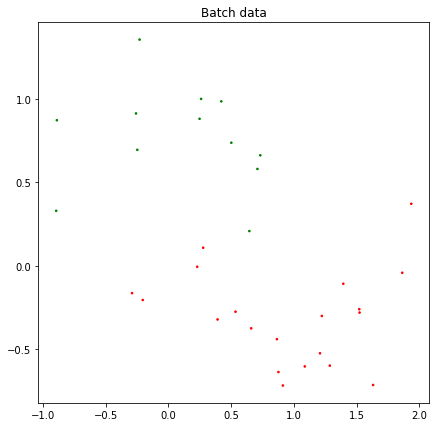

In [54]:
#!g1.1
plt.figure(figsize=(7, 7))

y_colors = ["r" if y else "g" for y in sample_y.numpy()]
plt.scatter(sample_x.numpy()[:, 0], sample_x.numpy()[:, 1], c=y_colors, marker=".", s=10)

plt.title("Batch data")
plt.show()

### **Model, Sequential**
https://www.tensorflow.org/api_docs/python/tf/keras/Model

```
Model groups layers into an object with training and inference features.

```
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
```
Sequential groups a linear stack of layers into a tf.keras.Model.
```


In [55]:
#!g1.1
%pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [100]:
#!g1.1
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [101]:
#!g1.1
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [102]:
#!g1.1
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


**Задача:** поясните, почему получилось именно такое количество обучаемых весов?


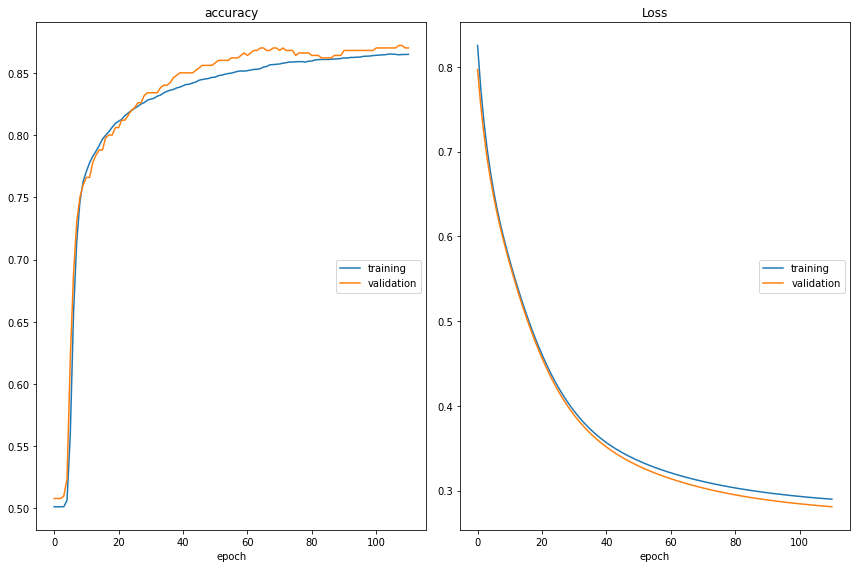

accuracy
	training         	 (min:    0.501, max:    0.865, cur:    0.865)
	validation       	 (min:    0.508, max:    0.872, cur:    0.870)
Loss
	training         	 (min:    0.290, max:    0.825, cur:    0.290)
	validation       	 (min:    0.281, max:    0.797, cur:    0.281)


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:872: UserWarning: The following variables cannot be serialized: train_dataset, val_dataset
  warnings.warn(message)


In [103]:
#!g1.1
from livelossplot import PlotLossesKeras

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
model.fit(train_dataset, validation_data=val_dataset, epochs=500, 
          callbacks=[PlotLossesKeras(), early_stopping_callback], verbose=False)


**Задача:** покажите на графике области переобучения и недообучения

**Задача:** добавьте `tf.keras.callbacks.EarlyStopping`: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


Ещё полезный коллбек: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

Подробнее про сохранение и загрузку моделей: https://www.tensorflow.org/tutorials/keras/save_and_load

In [60]:
#!g1.1
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

47/47 - 0s - loss: 0.0767 - accuracy: 0.9720

Test accuracy: 0.972000002861023


In [61]:
#!g1.1
x_1 = np.arange(X[:, 0].min(), X[:, 0].max(), 0.05)
x_2 = np.arange(X[:, 1].min(), X[:, 1].max(), 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)

In [62]:
#!g1.1
x_1.shape, x_2.shape

X_backgrond = np.concatenate([x_1.flatten()[:, None], x_2.flatten()[:, None]], axis=-1)
X_backgrond.shape

(5046, 2)

In [63]:
#!g1.1
y_backgrond_logits = model.predict(X_backgrond)
y_backgrond = tf.round(tf.nn.sigmoid(y_backgrond_logits))
y_backgrond_colors = ["r" if y else "g" for y in y_backgrond]


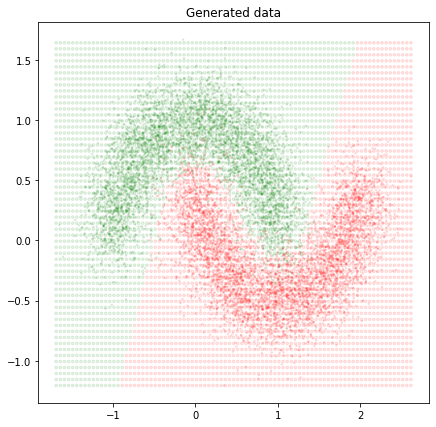

In [64]:
#!g1.1
plt.figure(figsize=(7, 7))

plt.scatter(X_backgrond[:, 0], X_backgrond[:, 1], c=y_backgrond_colors, marker=".", s=30, alpha=0.1)

y_colors = ["r" if y else "g" for y in y_true]
plt.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10, alpha=0.1)

plt.title("Generated data")
plt.show()

#### Результаты экспериментов

№ эксперимента | минимальный лосс на валидации | максимальный accuracy на валидации | accuracy на тесте 
--- | --- | --- | ---
1 | **0.081** | **0.976** |  **0.972**
2 | 0.081 | 0.976 |  0.972

#### Описание экспериментов
№ эксперимента | количество скрытых слоёв | текстовый комментарий 
--- | --- | ---
1 | 1 | модель не переобучилась

## Практика

### Полезные ссылки (туториалы)

https://www.tensorflow.org/tutorials/keras/classification

https://www.tensorflow.org/tutorials/quickstart/advanced

https://github.com/keras-team/keras-io/blob/master/guides/ipynb/intro_to_keras_for_engineers.ipynb


### Полезные ссылки (слои)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

### **Задание**: скачайте датасет mnist, повторите все шаги, попробуйте подобрать оптимальную архитектуру, используя dropout и batchnorm 



Скачайте датасет

In [79]:
#!g1.1
mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

In [67]:
#!g1.1
type(x_test)

numpy.ndarray

Так как у нас мультиклассовая классификация, сделаем **one hot encoding** на лейблах.

Наш ответ может принимать 10 разных значений. В этом случае **one hot encoding** подразумевает создание на один лейбл 10 значений, все из которых равны нулю, за исключением одного. На позицию, соответствующую численному значению признака мы помещаем 1.

In [83]:
#!g1.1
n_values = 10

# YOUR CODE HERE
y_train_full_one_hot = np.eye(n_values)[y_train_full]
y_test_one_hot = np.eye(n_values)[y_test]

In [82]:
#!g1.1
y_train_full_one_hot

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [75]:
#!g1.1
np.eye(n_values)[y_train_full[:5]]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [69]:
#!g1.1
print("Train size = %i, test_size = %i"%(len(x_train_full),len(x_test)))

Train size = 60000, test_size = 10000


Посмотрим на картинки из трейна

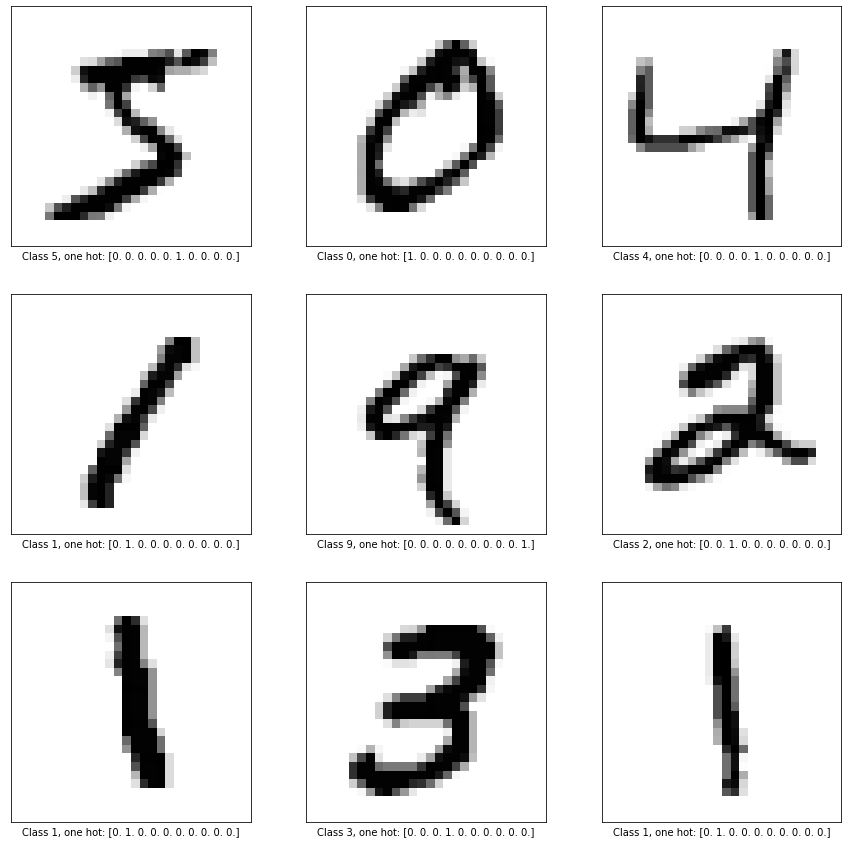

In [70]:
#!g1.1
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_full[i], cmap=plt.cm.binary)
    plt.xlabel('Class {0}, one hot: {1}'.format(y_train_full[i], y_train_full_one_hot[i]))
plt.show()

Разделите трейн на трейн и валидацию, отделив 10%


In [85]:
#!g1.1
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train_one_hot, y_validation_one_hot = train_test_split(
    x_train_full, y_train_full_one_hot, stratify=y_train_full, test_size=0.1)

In [86]:
#!g1.1
x_train.shape

(54000, 28, 28)

Соберите Sequential модель по аналогии с первой половиной занятия. 

Чтобы картинки перевести в векторную форму, используйте слой Flatten: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten


In [ ]:
#!g1.1
# YOUR CODE HERE

Скомпилируйте и обучите полученную модель

Так как у нас мультиклассовая классификация, вместо лосса **BinaryCrossentropy** нам нужно использовать **CategoricalCrossentropy**:

https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

In [ ]:
#!g1.1
# YOUR CODE HERE